# Measuring the value of groundwater and other forms of natural capital
## Fenichel et al. 2016
https://doi.org/10.1073/PNAS.1513779113

Valuing natural capital is fundamental to measuring sustainability.
The United Nations Environment Programme, World Bank, and
other agencies have called for inclusion of the value of natural
capital in sustainability metrics, such as inclusive wealth. Much has
been written about the importance of natural capital, but
consistent, rigorous valuation approaches compatible with the
pricing of traditional forms of capital have remained elusive. We
present a guiding quantitative framework enabling natural capital
valuation that is fully consistent with capital theory, accounts for
biophysical and economic feedbacks, and can guide interdisciplinary efforts to measure sustainability. We illustrate this framework
with an application to groundwater in the Kansas High Plains
Aquifer, a rapidly depleting asset supporting significant food
production. We develop a 10-y time series (1996−2005) of natural
capital asset prices that accounts for technological, institutional,
and physical changes. Kansas lost approximately $110 million per
year (2005 US dollars) of capital value through groundwater withdrawal and changes in aquifer management during the decade
spanning 1996–2005. This annual loss in wealth is approximately
equal to the state’s 2005 budget surplus, and is substantially more
than investments in schools over this period. Furthermore, real
investment in agricultural capital also declined over this period.
Although Kansas’ depletion of water wealth is substantial, it
may be tractably managed through careful groundwater management and compensating investments in other natural and traditional assets. Measurement of natural capital value is required to
inform management and ongoing investments in natural assets.


<div style="text-align:center">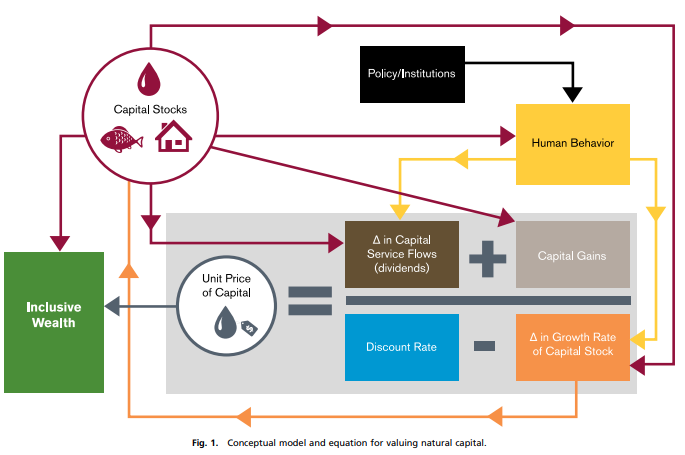</div>

---------------------------------------------

### I. **Derivation of Dynamic Equation**

$$p(s) = \frac{MD(s, x(s)) + \dot{p} (s)}{\delta - [MG(s) - MHI(s, x(s))]}$$

Intuition,

$$\frac{\text{Marginal ecosystem service flow + anticipated price (scarcity)}}{\text{discount rate - adjustment to natural capital (Growth minus Impact)}}$$

**Step 1: Define resource changes over time,**

$\frac{ds}{dt} = \dot{s} = \underbrace{G(s((t))}_{\text{Growth Fn}} - \underbrace{HI(s(t), x(s(t)))}_{\text{Human Impact Fn}}$

**Step 2: Define index of net benefits,**

$D((s), x(s(t)))$

**Step 3. Define net present value of benefits generated by natural capital at time $t$**

$V(s(t)) = \int_t^\infty e^{\delta(\tau-t)} D(s(\tau), x(s(\tau))) d\tau$

**Step 4. Express $V$ as a function of $s(t)$, substitute economic program, $x(s)$, in $D$. (Envelope Theorem Derivation)**

$D_S(s(t), x(s(t))) = \frac{\partial D}{\partial s} + \underbrace{\frac{\partial D}{\partial x} \frac{dx}{ds}}_{=0} = \frac{\partial D}{\partial s} = D_S^* = MD$


**Step 5: Define accouting price for capital (benefit from marginal increase in stock of capital),**

$p(s(t)) = \frac{\partial V(s(t))}{\partial s(t)}$

**Step 6. Differentiate $V(s(t))$ w.r.t. $t$,**

$\frac{\partial V}{\partial t} = \delta V - D(s, x(s)) = \frac{\partial V}{\partial s} \frac{ds}{dt} = p(s(t)) \frac{ds}{dt}$

rewrite,

$\delta V = D(s, x(s)) + p(s(t)) \dot{s} = H^* (s, p) $

$\hspace{20mm}$ where $H^*(s, p)$ is the current value Hamiltonian with economic program $x(s)$, with flow of benefits $D(s, x(s))$, and the value of increments to stock, $p \dot{s}$

rearrange,

$V(s) = \frac{D(s, x(s)) + p(s(t)) \dot{s}}{\delta}$

Now, differential $V(s)$ w.r.t. $s$ and rearrange,

$p(s) = \frac{D(s, x(s)) + \dot{p} (s)}{\delta - (G_s (s) - HI_s (s, x(s)))}$

Remove subscripts, $s$, and replace with marginal impacts of the stock with $M$.

$$p(s) = \frac{MD(s, x(s)) + \dot{p} (s)}{\delta - [MG(s) - MHI(s, x(s))]}$$

Done. $\large{\blacksquare}$

---------------------------------------------

### II. **Approximate Dynamic Equation**

Need to approximate unknown parameters, $p$ and $\dot{p}$

$p \approx \mu (s(t)) = \sum_{n=0}^{k-1} \beta_n \phi_n (s(t))$ $\hspace{20mm} $ 

$\hspace{10mm}$ where $\mu (s(t))$ is a Chebyshev polonomial in $s$ and $k$ basis functions (approximations). $\phi_n (s(t))$ are basis functions, and $\beta_n$ are a set of parameters determining the weighting of these basis functions.

$\dot{p} \approx \mu_s (s(t)) \dot{s}(t)$ $\hspace{20mm$ 

$\hspace{10mm}$ where $\mu_s (s(t)) = \sum_{n=0}^{k-1} \beta_n \Delta \phi_n (s(t))$ and $\Delta \phi_n (s(t))$ is the derivative of the basis function w.r.t. $s(t)$. $\dot{p}$ requires higher-order derivatives.

------------------------------------------------

## III. Replication Code

Estimate $MD(s, x(s))$ and $MHI(s, x(s))$ where economic program $x(s)$ reflects decisions of crop choice and irrigation pumping as a function of the groundwater stock under an acre

$MD(s, x(s))$ links the change in the water in the aquifer with the change in the field-level net revenues.

$MHI(s, x(s))$ is influenced indirectly through the economic program by the irrigation requirements of various crop choices.

$MHI(s)$ computed as the change in water in the aquifer resulting from water withdrawl.

Recharge rate = 1.25 per year.

Discount rate = 3%

$MG(s) = 0$ because hydrologic theory does not support stock-dependent recharge rates.

Estimate,

$$p(s) = \frac{MD(s, x(s)) + \dot{p}}{0.03 + MHI(s, x(s))}$$

$MD(s, x(s))$ and $MHI(s, x(s))$ can be estimated using econometric methods or simple derivation of functional form. 

$\dot{p}$ is estimated using a Chebychev Polynomial to forecast capital gains from observed price data.

### 1. Environment Setup

In [65]:
### Load libraries
library(tidyverse)
library(capn)
library(repmis)

### Set git branch
gitbranch <- "master"

### Load external functions (system_fns.R)
source(paste0("https://raw.githubusercontent.com/efenichel/capn_stuff/",gitbranch,"/system_fns.R")) #will need to fix in the end

### Load script to process raw data (data_setup.R)
source(paste0("https://github.com/efenichel/capn_stuff/raw/",gitbranch,"/data_setup.R"))

### Get data
source_data(paste0("https://github.com/efenichel/capn_stuff/raw/",gitbranch,"/KSwater_data.RData")) #Rdata file upload
ksdata <- KSwater_data #save KSwater_data as ksdata 

## STRUCTURE of ksdata 
#The object ksdata is a list of 7 lists. Each of the 7 lists corresponds to a groundwater management district (1-5), 
# the outgroup(6), or the entire state of Kansas(7).
# Each list will have 11 named elements, the number reference the elements in the list:
# [1] $gmdnum: int   1:7
# [2] $mlogitcoeff: df with dim = (#cropcodes x 23) containing the coefficients and intercept terms from the multinomial logit model
# [3] $mlogitmeans: df containing the mean for each of the variables run in the mlogit model
# [4] $cropamts: df containing the mean acres planted to each of the 5 crop cover types for each cropcode
# [5] $watercoeff: df containing the water withdrawal regression coefficients and intercept
# [6] $wwdmeans: df containing the means for each of the variables in the water withdrawal regression
# [7] $costcropacre: df dim=(1x5) containing the cost per acre of planting each of the 5 crops
# [8] $cropprices: df dim=(5x1) containing the per unit prices of each of the crops
# [9] $meanwater: num mean AF water in the region of interest
# [10]$recharge: num recharge rate for the region of interest
# [11]$watermax: num upper bound of domain for node space, max water observed in region.



SHA-1 hash of the downloaded data file is:
b739fc2e4800300edb8c2d90da79d86d557a58df



[1] "KSwater_data"

### 2. Data Step
------------------------------------------------

In [66]:
### Set region
my.region <- 7

### Create data structure
if (!exists("region")){ region <- my.region }
region_data <- ksdata[[region]] 

### Process data
gw.data <- datasetup(region) 

# the gw.data data repackages parameters and means, see the datasetup code. 
# the return is of the form 
# list(crop.coeff, crop.amts, alpha, beta, gamma, gamma1, gamma2, crop.prices, cost.crop.acre)

### 3. Model Setup
------------------------------------------------

In [67]:
### Economic Parameters
dr <- 0.03    # discount rate

### System parameters
recharge <- region_data[['recharge']]    # units are inches per year constant rate

### capN parameters
order <- 10        # approximaton order
NumNodes <- 100    # number of nodes
wmax <- region_data[['watermax']]        # This sets the the upper bound on water amount to consider

### Prepare capN
Aspace <- aproxdef(order, 0, wmax, dr)      # defines the approximation space
nodes <- chebnodegen(NumNodes, 0, wmax)     # define the nodes

### Prepare for simulation
simuData <- matrix(0, nrow = NumNodes, ncol = 5)

### 4. Estimation
------------------------------------------------

In [68]:
### Simulate at nodes
for(j in 1:NumNodes){
  simuData[j, 1] <- nodes[j]                            # water depth nodes
  simuData[j, 2] <- sdot(nodes[j], recharge, gw.data)   # change in stock over change in time
  simuData[j, 3] <- 0 - WwdDs1(nodes[j], gw.data)       # d(sdot)/ds, of the rate of change in the change of stock
  simuData[j, 4] <- ProfDs1(nodes[j], gw.data)          # Change in profit with the change in stock
  simuData[j, 5] <- profit(nodes[j], gw.data)           # profit
}

### Recover approximating coefficents
pC <- paprox(Aspace, simuData[, 1], simuData[, 2], simuData[, 3], simuData[, 4])  #the approximated coefficent vector for prices

### Project shadow prices, value function, and inclusive wealth
waterSim <- psim(pcoeff = pC,
                 stock = simuData[ ,1],
                 wval = simuData[ ,5],
                 sdot = simuData[ ,2])

### Convert to data.frame 
waterSim <- as.data.frame(waterSim)

cat("if everything runs well the next line should say 17.44581", "\n")
cat("At 21.5 acre feet of water, the shadow price is" , psim(pC, 21.5)$shadowp, "\n")

if everything runs well the next line should say 17.44581 
At 21.5 acre feet of water, the shadow price is 17.44581 


### 5. Plot Results
------------------------------------------------

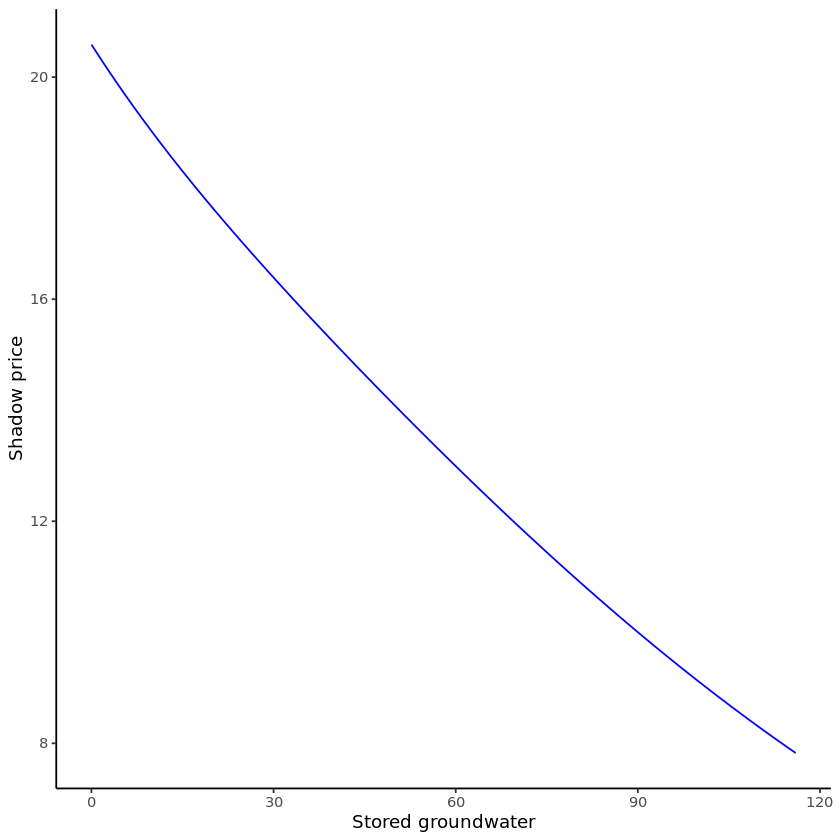

In [69]:
### Plot water shadow price function
ggplot() + 
    geom_line(data = waterSim, aes(x = stock, y = shadowp), color = 'blue') +
    labs(x= "Stored groundwater", y = "Shadow price")  +
    theme(axis.line = element_line(color = "black"), 
          panel.background = element_rect(fill = "transparent",colour = NA),
          plot.background = element_rect(fill = "transparent",colour = NA))

Warning message:
“Removed 8 row(s) containing missing values (geom_path).”


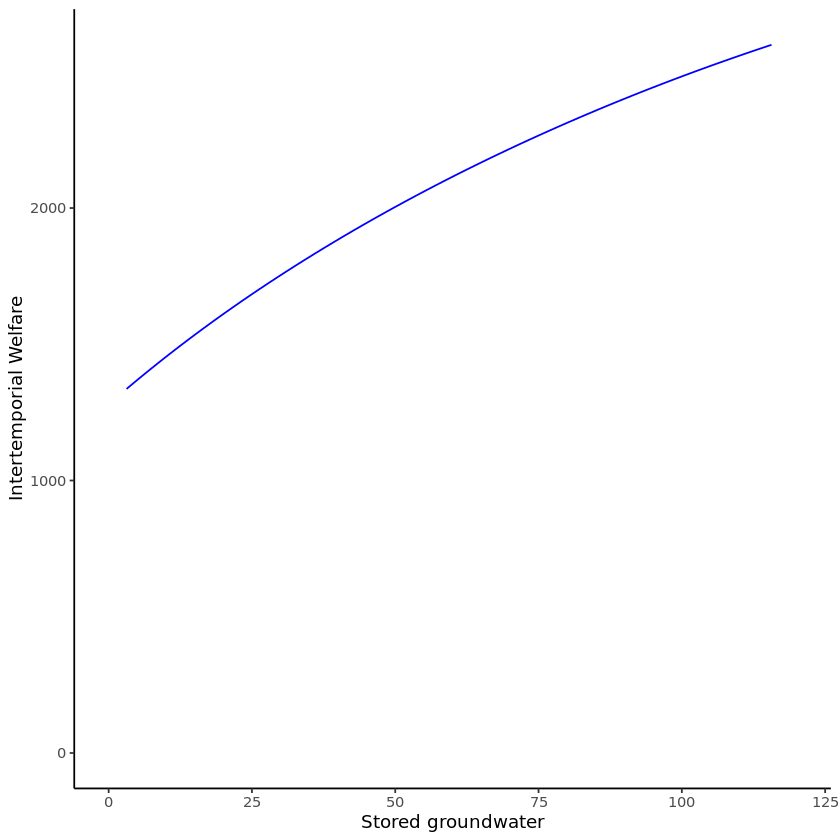

In [70]:
### Plot value function
lrange <- 6 # the closest nodes to zero have some issues. 

ggplot() + 
  geom_line(data = waterSim[lrange :100,], aes(x = stock[lrange :100], y = vfun[lrange :100]), color = 'blue') +
  xlim(0, 120) +
  ylim(0, 2600) +
  labs(x= "Stored groundwater", y = "Intertemporial Welfare")  +
  theme(axis.line = element_line(color = "black"), 
        panel.background = element_rect(fill = "transparent",colour = NA),
        plot.background = element_rect(fill = "transparent",colour = NA))

In [71]:
### Check on results
testme <- psim(pcoeff = pC, 
             stock = c(18.5, 21.5), 
             wval = c(profit(18.5, gw.data), profit(21.5, gw.data)),
             sdot = c(sdot(18.5, recharge, gw.data), sdot(21.5, recharge, gw.data)))
print(testme)
testme

$shadowp
         [,1]
[1,] 17.83600
[2,] 17.44581

$iw
         [,1]
[1,] 329.9659
[2,] 375.0848

$vfun
         [,1]
[1,] 1588.393
[2,] 1633.214

$stock
     [,1]
[1,] 18.5
[2,] 21.5

$wval
[1] 91.71122 92.96710



17.83600
17.44581
329.9659
375.0848
1588.393
1633.214
18.5
21.5
